In [40]:
import pandas as pd
import numpy as np

In [41]:
#Reading the 'plays' dataset, turning all items into integers
users = pd.DataFrame(np.array([i.strip().split("\t") for i in open('lastfm_data/user_artists.dat', 'r', encoding='latin-1').readlines()]),
                       columns = ['userID', 'artistID', 'plays'])
users = users.drop(users.index[0])
users = users.apply(pd.to_numeric)
users.head()

#Reading 'artists' dataset, splitting the first column into three columns on the newline, turning artistid into int
artists = pd.DataFrame(open('lastfm_data/artists.dat', 'r',  encoding='latin-1').readlines())
artists = pd.DataFrame(artists[0].str.split("\t").values.tolist(),columns = ['artistID', 'name', 'url', 'pictureURL'])
artists = artists.drop(artists.index[0])
artists = artists.drop(columns=['pictureURL'])
artists['artistID'] = artists['artistID'].apply(pd.to_numeric)


In [42]:
users_artists = pd.merge(users, artists, on='artistID', how='left')

In [43]:
users_artists.head()

,userID,artistID,plays,name,url
0,2,51,13883,Duran Duran,http://www.last.fm/music/Duran+Duran
1,2,52,11690,Morcheeba,http://www.last.fm/music/Morcheeba
2,2,53,11351,Air,http://www.last.fm/music/Air
3,2,54,10300,Hooverphonic,http://www.last.fm/music/Hooverphonic
4,2,55,8983,Kylie Minogue,http://www.last.fm/music/Kylie+Minogue


In [57]:
artist_count = users_artists.groupby('name')['plays'].count()

In [58]:
artist_count.head()

name
!!!                     2
!DISTAIN                2
!deladap                1
"Weird Al" Yankovic    14
#####                   8
Name: plays, dtype: int64

In [62]:
total_plays = users_artists.groupby('name')['plays'].sum()
# total_plays = pd.DataFrame(total_plays)
# total_plays = total_plays.sort_values(by=['plays'], ascending = False)

In [63]:
total_plays.head()

name
!!!                    2826
!DISTAIN               1257
!deladap                 65
"Weird Al" Yankovic    5210
#####                  3707
Name: plays, dtype: int64

In [49]:
artist_count.plot(kind='hist')

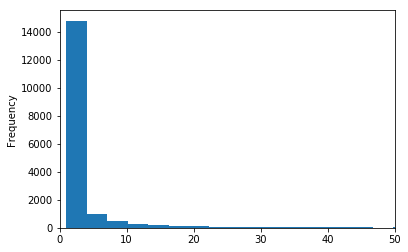

In [50]:
artist_count.plot(kind='hist', xlim = [0,50], bins = 200)

In [51]:
artist_count = pd.DataFrame(data)

NameError: name 'data' is not defined

In [54]:
artist_count = artist_count.sort_values(by=['plays'], ascending = False)

artist_count.head()

TypeError: sort_values() got an unexpected keyword argument 'by'

In [42]:
artist_count.describe()

,plays
count,17632.000000
mean,5.265086
std,20.620315
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,611.000000


In [ ]:
import matplotlib.pyplot as plt

plt.plot(data)
# data.plot(title = 'Count of people who listen to each artist', xlim = [0,2000], ylim=0)

In [53]:
top_20_counts = artist_count.nlargest(20, 'plays')

ValueError: keep must be either "first", "last"

In [16]:
top_20_counts.head()

,plays
name,
Lady Gaga,611
Britney Spears,522
Rihanna,484
The Beatles,480
Katy Perry,473


In [37]:
total_plays = users_artists.groupby('name')['plays'].sum()

In [38]:
total_plays = pd.DataFrame(total_plays)
total_plays = total_plays.sort_values(by=['plays'], ascending = False)
total_plays.head()

NameError: name 'total_plays' is not defined

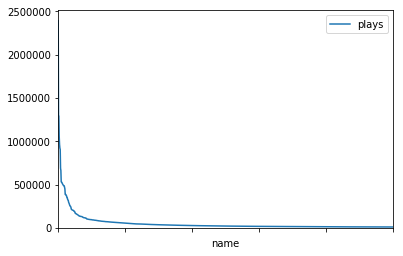

In [31]:
total_plays.plot(xlim=[0,1000],ylim=0)

In [33]:
total_plays.describe()

,plays
count,1.763200e+04
mean,3.923774e+03
std,3.409934e+04
min,1.000000e+00
25%,1.130000e+02
50%,3.500000e+02
75%,1.234250e+03
max,2.393140e+06


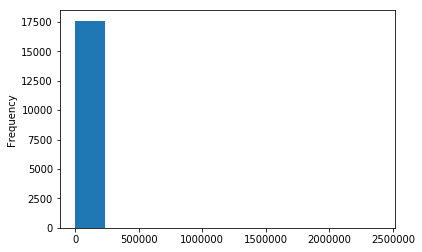

In [67]:
total_plays.plot(kind='hist')

In [69]:
plays_per_user = users_artists.groupby('userID')['plays'].count()

In [72]:
pd.DataFrame(plays_per_user).describe()

,plays
count,1892.000000
mean,49.066596
std,5.845879
min,1.000000
25%,50.000000
50%,50.000000
75%,50.000000
max,50.000000


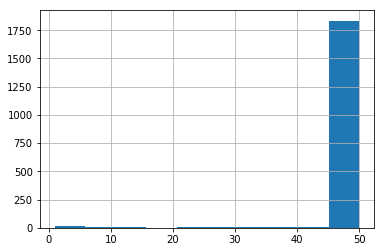

In [73]:
plays_per_user.hist()

In [18]:
import pandas as pd
import numpy as np
users = pd.DataFrame(np.array([i.strip().split("\t") for i in open('lastfm_data/user_artists.dat', 'r', encoding='latin-1').readlines()]),
                       columns = ['userID', 'artistID', 'plays'])
users = users.drop(users.index[0])
users = users.apply(pd.to_numeric)
users.head()

#Reading 'artists' dataset, splitting the first column into three columns on the newline, turning artistid into int
artists = pd.DataFrame(open('lastfm_data/artists.dat', 'r',  encoding='latin-1').readlines())
artists = pd.DataFrame(artists[0].str.split("\t").values.tolist(),columns = ['artistID', 'name', 'url', 'pictureURL'])
artists = artists.drop(artists.index[0])
artists = artists.drop(columns=['pictureURL'])
artists['artistID'] = artists['artistID'].apply(pd.to_numeric)
users_artists = pd.merge(users, artists, on='artistID', how='left')
# Create a utility matrix A by pivoting ratings.df
users_artists_piv = users_artists.pivot(index = 'userID', columns = 'name', values = 'plays').fillna(0)
users_artists_piv = users_artists_piv.loc[(users_artists_piv.sum(axis=1) > 1), (users_artists_piv.sum(axis=0) > 150)]
users_artists_piv=users_artists_piv.reset_index()
users_artists_piv=users_artists_piv.iloc[:,1:]
users_artists_piv.head()
play_counts = users_artists_piv.sum(axis = 0, skipna = True).sort_values(ascending = False)
play_counts = pd.DataFrame(play_counts, columns = ['plays'])
top_20 = pd.DataFrame(play_counts.nlargest(20, 'plays'))


In [25]:
play_counts = users_artists_piv.sum(axis = 0, skipna = True).sort_values(ascending = False)
play_counts = pd.DataFrame(play_counts, columns = ['plays'])
top_20 = pd.DataFrame(play_counts.nlargest(20, 'plays'))

In [26]:
top_20

,plays
name,
Britney Spears,2393140.0
Depeche Mode,1301308.0
Lady Gaga,1291387.0
Christina Aguilera,1058405.0
Paramore,963449.0
Madonna,921198.0
Rihanna,905423.0
Shakira,688529.0
The Beatles,662116.0
